In [1]:
from tsai.all import *
import sklearn.metrics as skm
import numpy as np
import torch
import random
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold

In [2]:
T_raw = np.load("T_subjects_1,5_nsd_vs_rest.npy")[:, 1]
X_raw = np.load("X_subjects_1,5_nsd_vs_rest.npy")[:, 1]
y = np.load("y_subjects_1,5_nsd_vs_rest.npy")[1]
T_raw.shape, X_raw.shape, y.shape

((956, 226, 116), (956, 116, 116), (956,))

In [7]:
computer_setup()

os              : Linux-4.4.0-19041-Microsoft-x86_64-with-glibc2.29
python          : 3.8.10
tsai            : 0.3.6
fastai          : 2.7.12
fastcore        : 1.5.29
torch           : 1.13.0+cu117
cpu cores       : 4
threads per cpu : 2
RAM             : 6.94 GB
GPU memory      : N/A


In [5]:
# To be able to use timeseriesAI your data needs to have 3 dimensions:

# -> number of samples
# -> number of features (aka variables, dimensions, channels)
# -> number of steps (or length, time steps, sequence steps)

dmn = [22, 23, 34, 35, 36, 37, 38, 39, 64, 65, 66, 67]
T_bn = np.transpose(T_raw, axes=(0, 2, 1))[:, dmn]
T_bn.shape

(956, 12, 226)

In [ ]:
get_predefined_splits

In [4]:
def model_score(X, y, model_name, n_repeats=10, n_splits=5, epochs=10, **model_kwargs):
    print(model_kwargs)
    accuracy_table = np.zeros((n_repeats, n_splits))
    for i in tqdm(range(n_repeats)):
        splitss = get_splits(y, n_splits=n_splits, valid_size=.2, stratify=True, random_state=i, shuffle=True)
        for j, splits in enumerate(splitss):
            seed = i * n_repeats + j
            torch.manual_seed(seed)
            random.seed(seed)
            np.random.seed(seed)
            
            tfms  = [None, [Categorize()]]
            dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
            dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

            model = model_name(dls.vars, dls.c, **model_kwargs)
            learn = Learner(dls, model, metrics=accuracy)
            learn.lr_find()
            learn.fit_one_cycle(epochs)

            accuracy_table[i, j] = np.max(np.array(learn.recorder.values)[:, 2])
    # convenient in jupyter notebook: instantly print accuracy and do not print the last line return value (which could be an accuracy table)
    return accuracy_table
    # return f"{xaccuracy.mean():.5f} ± {xaccuracy.std():.5f}"

{'seq_len': 226}


  0%|                                                                                             | 0/2 [00:00<?, ?it/s]

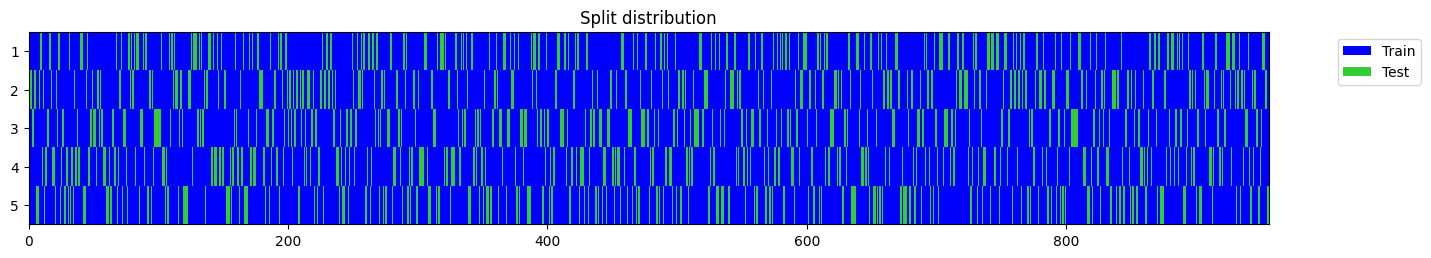

epoch,train_loss,valid_loss,accuracy,time
0,0.695086,0.679316,0.604167,00:03
1,0.665217,0.603778,0.677083,00:03
2,0.612918,0.527990,0.697917,00:03
3,0.551915,0.502431,0.750000,00:03
4,0.490568,0.463527,0.791667,00:03
5,0.434197,0.388163,0.807292,00:03
6,0.385215,0.382882,0.796875,00:03
7,0.342747,0.385394,0.817708,00:03
8,0.308747,0.371659,0.817708,00:03
9,0.284883,0.371700,0.822917,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.697591,0.670088,0.628272,00:03
1,0.664143,0.591414,0.696335,00:03
2,0.607633,0.532992,0.738220,00:03
3,0.548606,0.444936,0.795812,00:03
4,0.489592,0.395837,0.827225,00:03
5,0.439046,0.459424,0.738220,00:03
6,0.394749,0.511470,0.764398,00:03
7,0.357516,0.382163,0.827225,00:03
8,0.325069,0.386132,0.832461,00:03
9,0.295601,0.381391,0.832461,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.704463,0.679163,0.591623,00:03
1,0.666167,0.614567,0.649215,00:03
2,0.615831,0.748657,0.581152,00:04
3,0.560923,0.498515,0.759162,00:03
4,0.508396,0.443483,0.790576,00:04
5,0.454292,0.557495,0.727749,00:04
6,0.406376,0.498560,0.774869,00:04
7,0.367072,0.391047,0.801047,00:03
8,0.335208,0.380799,0.811518,00:04
9,0.310238,0.375636,0.801047,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.697465,0.675912,0.649215,00:04
1,0.657864,0.626848,0.607330,00:04
2,0.608500,0.511966,0.753927,00:04
3,0.551348,0.463496,0.759162,00:04
4,0.497129,0.361555,0.848168,00:04
5,0.447265,0.462647,0.774869,00:03
6,0.399723,0.321610,0.837696,00:03
7,0.359578,0.357247,0.821990,00:03
8,0.324977,0.319860,0.842932,00:03
9,0.297825,0.309953,0.842932,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.694879,0.684072,0.570681,00:04
1,0.660429,0.678453,0.591623,00:04
2,0.603438,0.630141,0.638743,00:03
3,0.540111,0.465840,0.769634,00:04
4,0.480965,0.627576,0.691099,00:04
5,0.428688,0.496517,0.780105,00:04
6,0.377500,0.431266,0.780105,00:04
7,0.338362,0.465471,0.748691,00:04
8,0.304890,0.398002,0.790576,00:04
9,0.278875,0.393894,0.801047,00:03


 50%|██████████████████████████████████████████                                          | 1/2 [05:57<05:57, 357.74s/it]

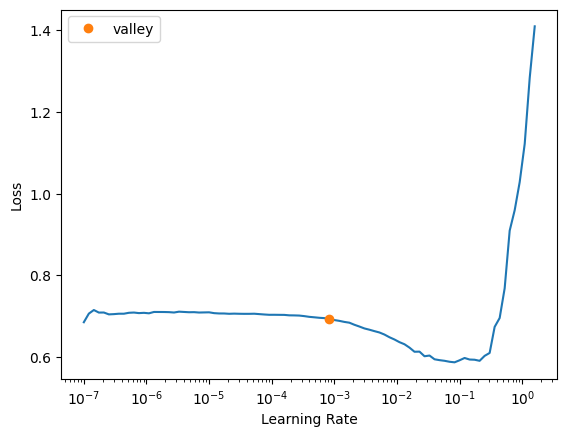

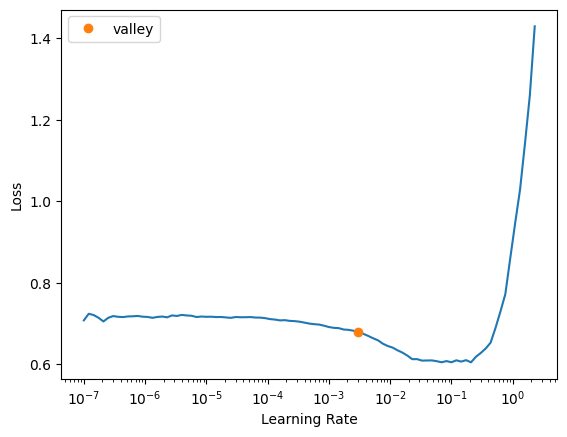

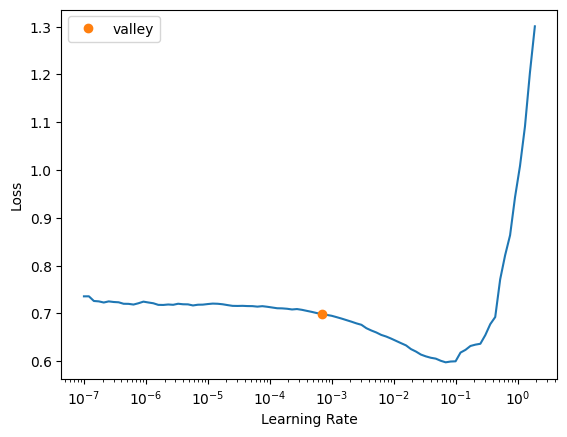

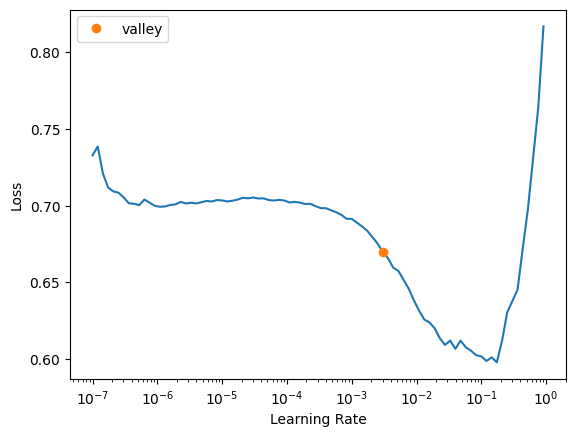

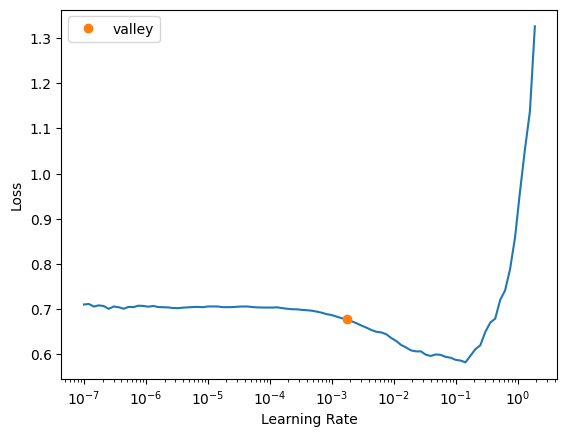

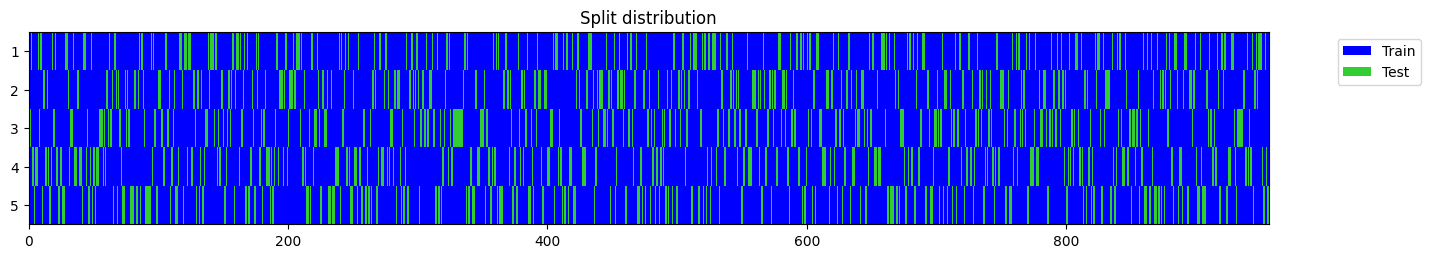

epoch,train_loss,valid_loss,accuracy,time
0,0.694544,0.683147,0.562500,00:04
1,0.655110,0.621008,0.640625,00:04
2,0.605381,0.719573,0.593750,00:03
3,0.553231,0.469035,0.786458,00:03
4,0.496891,0.436933,0.817708,00:03
5,0.445788,0.454081,0.796875,00:04
6,0.404572,0.529502,0.770833,00:04
7,0.367455,0.382960,0.802083,00:04
8,0.336276,0.379655,0.822917,00:04
9,0.310208,0.375403,0.812500,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.699656,0.676490,0.602094,00:03
1,0.663079,0.633036,0.623037,00:03
2,0.612296,0.501645,0.738220,00:04
3,0.553064,0.502838,0.706806,00:03
4,0.497464,0.353559,0.837696,00:04
5,0.448178,0.316582,0.858639,00:03
6,0.401504,0.312720,0.869110,00:04
7,0.355400,0.336356,0.837696,00:04
8,0.325861,0.309984,0.858639,00:04
9,0.299172,0.295137,0.863874,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.690338,0.677547,0.586387,00:04
1,0.652253,0.617767,0.617801,00:04
2,0.601296,0.564029,0.696335,00:04
3,0.537776,0.408063,0.821990,00:04
4,0.481382,0.450453,0.738220,00:04
5,0.429733,0.462250,0.769634,00:04
6,0.382340,0.991486,0.575916,00:03
7,0.343522,0.369472,0.821990,00:04
8,0.310974,0.324746,0.848168,00:04
9,0.286658,0.324741,0.848168,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.692660,0.674329,0.623037,00:03
1,0.659444,0.658315,0.565445,00:03
2,0.609589,0.636499,0.664921,00:04
3,0.550942,0.481374,0.753927,00:03
4,0.501740,0.749254,0.602094,00:03
5,0.449673,0.341352,0.848168,00:04
6,0.405269,0.513257,0.774869,00:04
7,0.365288,0.313364,0.832461,00:04
8,0.332297,0.298617,0.848168,00:04
9,0.306872,0.298423,0.842932,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.699164,0.688312,0.534031,00:04
1,0.667633,0.622437,0.643979,00:04
2,0.610388,0.576047,0.685864,00:03
3,0.546032,0.443018,0.811518,00:04
4,0.481350,0.619458,0.643979,00:04
5,0.422560,0.415453,0.811518,00:04
6,0.370441,0.404962,0.816754,00:03
7,0.326893,0.408703,0.795812,00:03
8,0.289055,0.404478,0.811518,00:04
9,0.260774,0.404361,0.811518,00:03


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [12:06<00:00, 363.09s/it]


'0.83212 ± 0.01984'

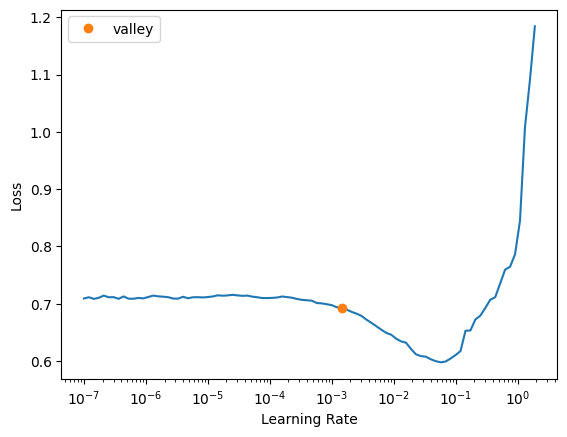

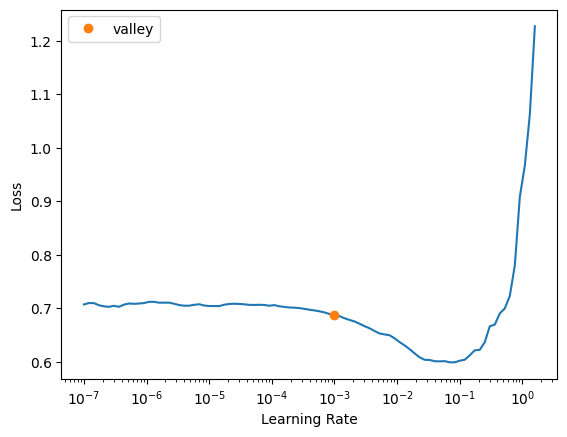

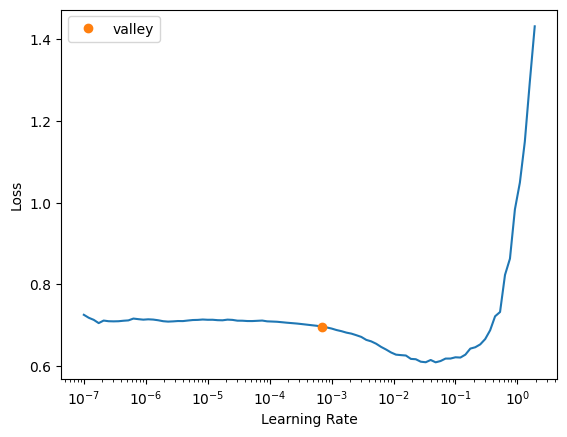

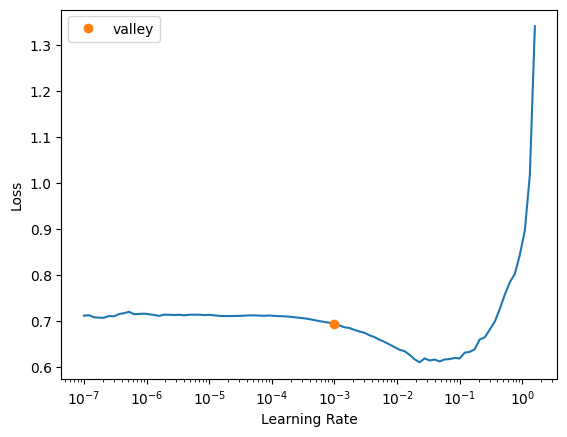

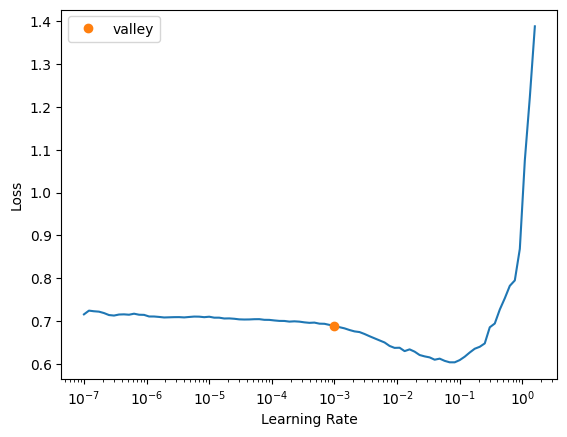

In [98]:
model_score(T_bn, y, MLSTM_FCN, seq_len=226, n_repeats=2)

In [103]:
MLSTM_FCN_acc_10_ep = '0.83212 ± 0.01984'

{}


  0%|                                                                                             | 0/2 [00:00<?, ?it/s]

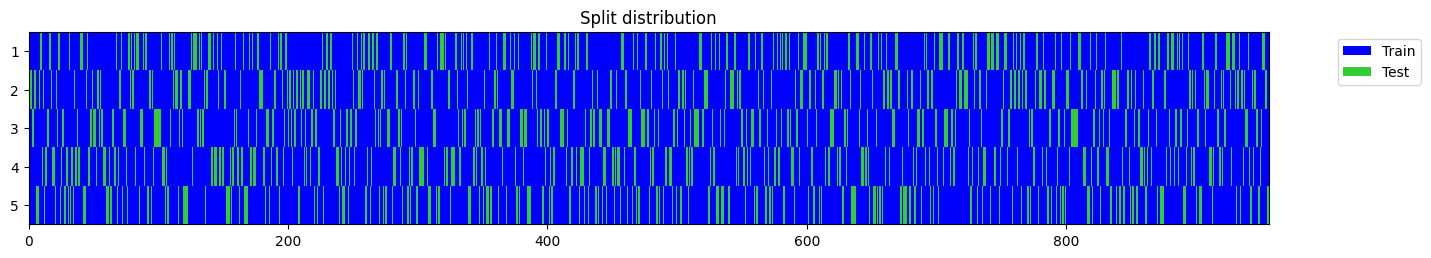

epoch,train_loss,valid_loss,accuracy,time
0,0.695512,0.700343,0.432292,00:02
1,0.688680,0.687246,0.567708,00:02
2,0.676960,0.679086,0.588542,00:02
3,0.666521,0.663896,0.578125,00:02
4,0.651292,0.645094,0.630208,00:02
5,0.639456,0.625827,0.635417,00:02
6,0.630515,0.640016,0.635417,00:02
7,0.623585,0.626153,0.645833,00:02
8,0.615003,0.627024,0.614583,00:02
9,0.609001,0.626467,0.619792,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.686870,0.688502,0.544503,00:02
1,0.683170,0.678460,0.581152,00:02
2,0.678248,0.659897,0.623037,00:02
3,0.669730,0.647242,0.617801,00:02
4,0.658726,0.621670,0.638743,00:02
5,0.647208,0.634049,0.612565,00:02
6,0.637678,0.632442,0.612565,00:02
7,0.629813,0.618195,0.643979,00:02
8,0.621319,0.618370,0.649215,00:02
9,0.614477,0.618027,0.649215,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.696176,0.692317,0.481675,00:02
1,0.689948,0.686380,0.554974,00:03
2,0.681478,0.675240,0.575916,00:02
3,0.673521,0.677196,0.575916,00:02
4,0.662544,0.663939,0.554974,00:03
5,0.649768,0.662334,0.602094,00:02
6,0.638387,0.671500,0.596859,00:03
7,0.628549,0.654675,0.591623,00:03
8,0.619032,0.651785,0.602094,00:03
9,0.611651,0.651918,0.602094,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.691103,0.681268,0.607330,00:03
1,0.687697,0.666397,0.570681,00:03
2,0.680681,0.642282,0.675393,00:03
3,0.671461,0.636013,0.628272,00:03
4,0.666512,0.613936,0.670157,00:02
5,0.656147,0.601972,0.670157,00:03
6,0.645990,0.588848,0.675393,00:02
7,0.637374,0.585504,0.659686,00:02
8,0.629908,0.584580,0.664921,00:03
9,0.623129,0.584311,0.664921,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.691376,0.690421,0.507853,00:02
1,0.688501,0.685390,0.544503,00:03
2,0.682107,0.671217,0.628272,00:02
3,0.670210,0.667917,0.607330,00:03
4,0.653244,0.665075,0.612565,00:03
5,0.638487,0.674918,0.628272,00:03
6,0.624151,0.649624,0.586387,00:02
7,0.613090,0.653678,0.623037,00:03
8,0.602330,0.656257,0.602094,00:02
9,0.592706,0.655846,0.602094,00:03


 50%|██████████████████████████████████████████                                          | 1/2 [04:35<04:35, 275.47s/it]

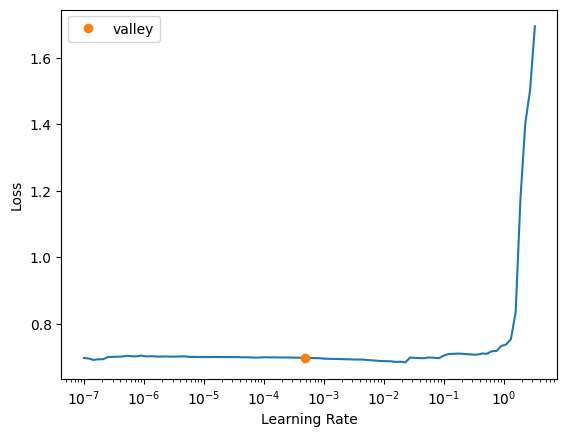

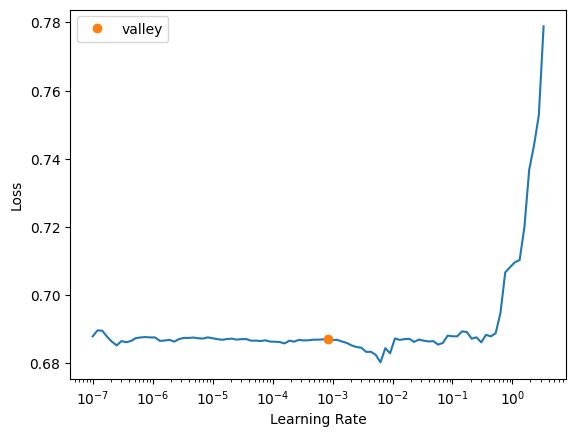

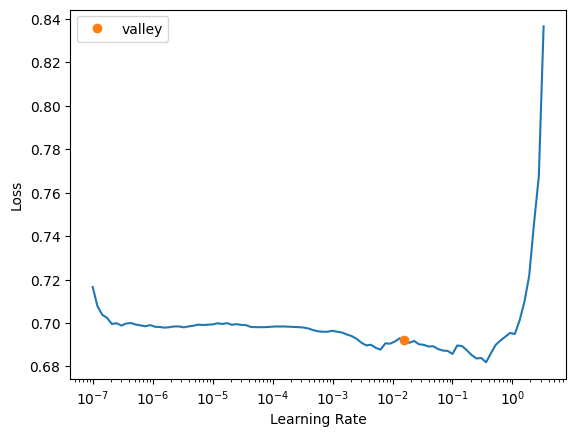

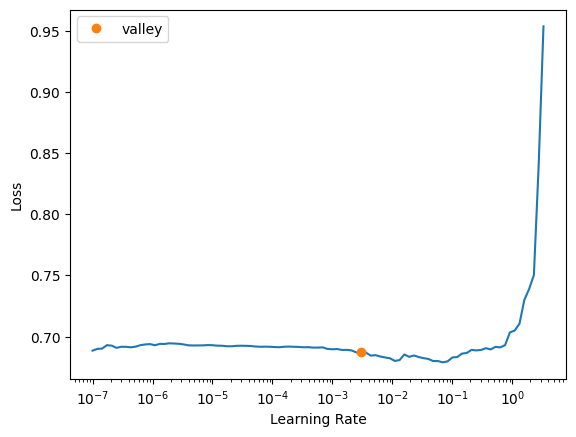

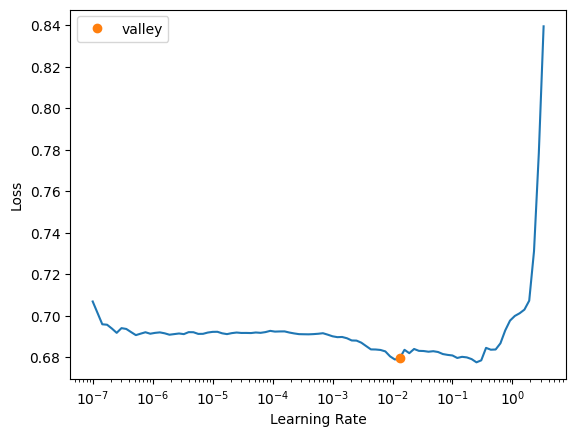

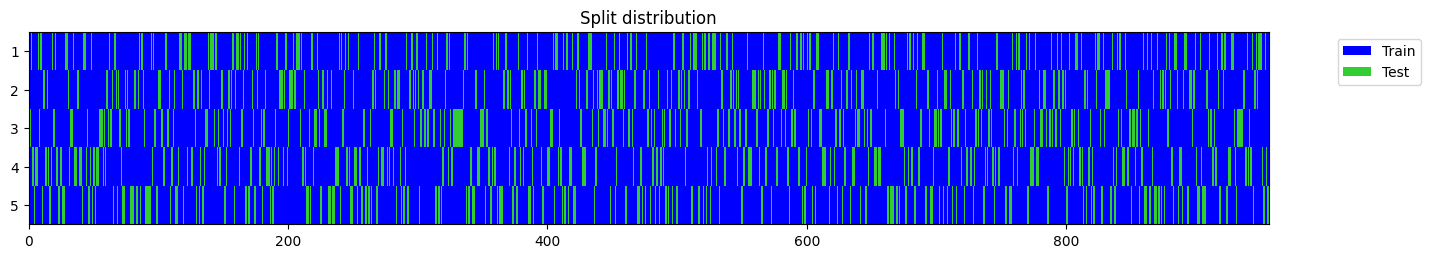

epoch,train_loss,valid_loss,accuracy,time
0,0.697096,0.693512,0.500000,00:02
1,0.690916,0.687710,0.526042,00:03
2,0.683715,0.673049,0.609375,00:02
3,0.673045,0.664849,0.588542,00:02
4,0.657948,0.676421,0.593750,00:03
5,0.642915,0.661399,0.588542,00:02
6,0.629692,0.683020,0.583333,00:03
7,0.621419,0.677443,0.604167,00:03
8,0.612775,0.672178,0.598958,00:03
9,0.604875,0.669403,0.593750,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.689261,0.685784,0.575916,00:02
1,0.685629,0.670145,0.581152,00:02
2,0.679080,0.648698,0.643979,00:03
3,0.669218,0.625456,0.643979,00:02
4,0.659785,0.612741,0.643979,00:03
5,0.655465,0.612082,0.670157,00:02
6,0.646717,0.612166,0.654450,00:02
7,0.637854,0.602702,0.675393,00:02
8,0.631679,0.600633,0.659686,00:02
9,0.626363,0.599944,0.659686,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.691140,0.689146,0.513089,00:02
1,0.685918,0.685813,0.534031,00:02
2,0.680904,0.666368,0.591623,00:02
3,0.670235,0.664856,0.607330,00:02
4,0.655382,0.642810,0.628272,00:02
5,0.639379,0.633617,0.633508,00:02
6,0.627584,0.625557,0.623037,00:02
7,0.616214,0.619837,0.643979,00:02
8,0.606429,0.617353,0.649215,00:02
9,0.598052,0.617072,0.643979,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.700260,0.697530,0.502618,00:02
1,0.696800,0.684731,0.534031,00:03
2,0.689619,0.667769,0.560209,00:03
3,0.678994,0.638138,0.607330,00:03
4,0.665028,0.606710,0.654450,00:02
5,0.651549,0.615558,0.617801,00:02
6,0.640021,0.597579,0.670157,00:03
7,0.629098,0.598444,0.649215,00:02
8,0.620504,0.590267,0.670157,00:02
9,0.614128,0.590105,0.675393,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.697774,0.697207,0.507853,00:03
1,0.689529,0.684303,0.570681,00:03
2,0.679436,0.670164,0.633508,00:02
3,0.668083,0.651571,0.602094,00:02
4,0.655370,0.630108,0.633508,00:03
5,0.643080,0.631170,0.643979,00:03
6,0.629589,0.626890,0.654450,00:02
7,0.621910,0.620662,0.638743,00:03
8,0.616420,0.623025,0.659686,00:02
9,0.608679,0.619875,0.670157,00:02


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [09:19<00:00, 279.57s/it]


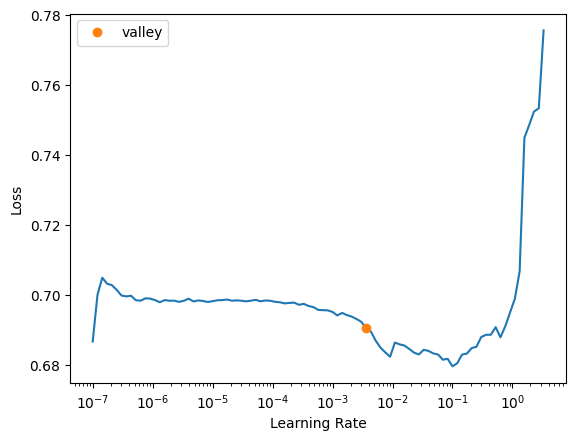

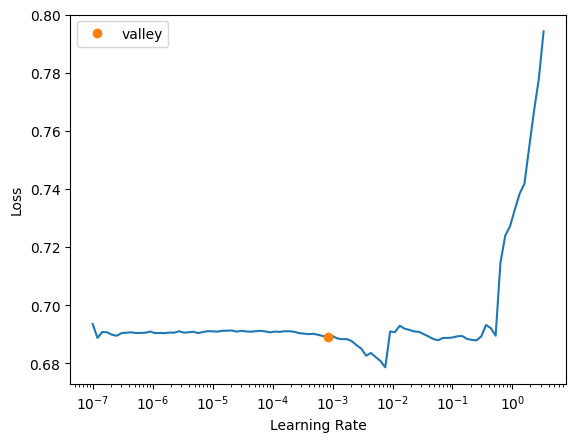

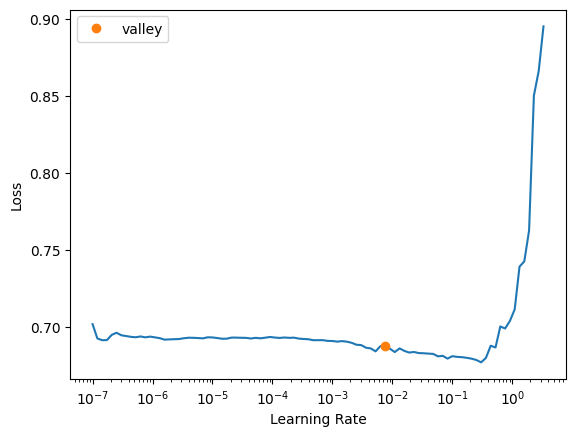

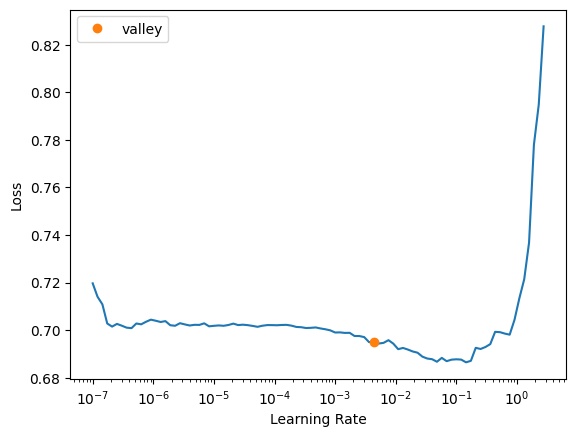

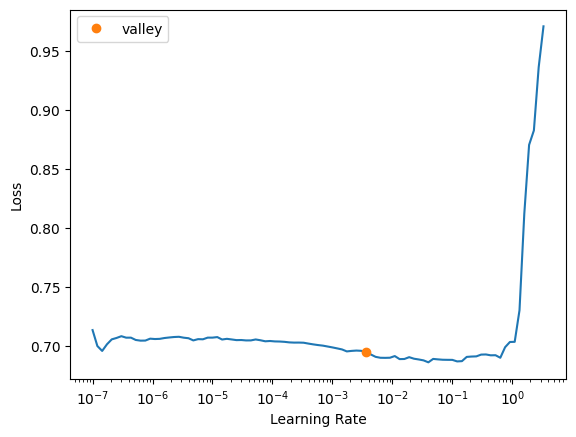

In [99]:
LSTM_acc_10_ep = model_score(T_bn, y, LSTM, n_repeats=2)

In [105]:
LSTM_score_acc_10_ep

'0.64803 ± 0.02596'

{}


  0%|                                                                                             | 0/2 [00:00<?, ?it/s]

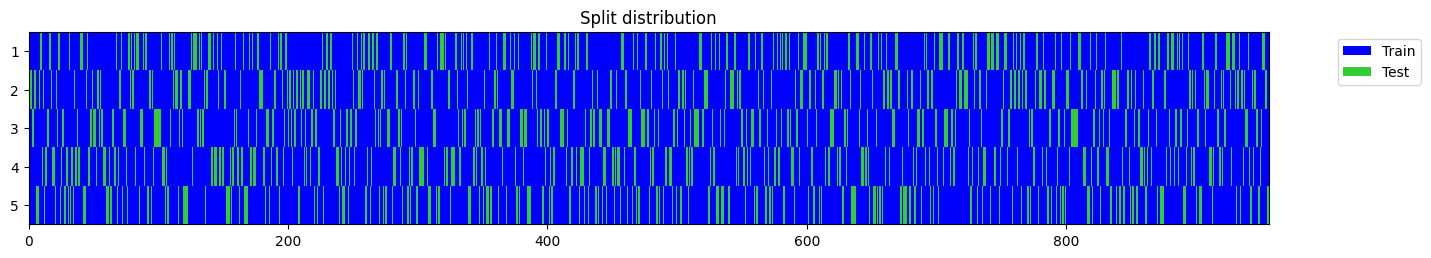

epoch,train_loss,valid_loss,accuracy,time
0,0.696796,0.705739,0.442708,00:02
1,0.692946,0.698252,0.489583,00:02
2,0.687752,0.690291,0.541667,00:02
3,0.682532,0.686216,0.557292,00:02
4,0.675719,0.677887,0.578125,00:02
5,0.667649,0.664550,0.598958,00:02
6,0.659029,0.649681,0.604167,00:02
7,0.652399,0.655542,0.635417,00:02
8,0.643616,0.650521,0.578125,00:02
9,0.633780,0.638820,0.625000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.686888,0.690227,0.534031,00:03
1,0.685326,0.687510,0.539267,00:02
2,0.684656,0.682169,0.549738,00:02
3,0.682159,0.675771,0.575916,00:02
4,0.678466,0.663249,0.617801,00:02
5,0.671497,0.637257,0.628272,00:02
6,0.663831,0.630845,0.654450,00:02
7,0.654356,0.641919,0.623037,00:02
8,0.643847,0.615516,0.659686,00:02
9,0.634359,0.649917,0.617801,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.697065,0.694851,0.502618,00:03
1,0.694418,0.691160,0.502618,00:03
2,0.691779,0.687492,0.560209,00:03
3,0.687908,0.684417,0.565445,00:03
4,0.683025,0.676657,0.575916,00:03
5,0.674268,0.670464,0.560209,00:03
6,0.662150,0.660169,0.586387,00:02
7,0.653886,0.649146,0.591623,00:03
8,0.642640,0.649668,0.607330,00:03
9,0.630767,0.652217,0.607330,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.691903,0.685037,0.602094,00:03
1,0.690273,0.679385,0.596859,00:02
2,0.687381,0.671433,0.581152,00:02
3,0.686094,0.662274,0.586387,00:02
4,0.681622,0.649392,0.706806,00:02
5,0.674244,0.614095,0.691099,00:02
6,0.665004,0.595674,0.680628,00:02
7,0.655126,0.597732,0.643979,00:02
8,0.644328,0.587055,0.654450,00:03
9,0.636472,0.589602,0.654450,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.691553,0.691226,0.502618,00:03
1,0.690738,0.689851,0.507853,00:03
2,0.689092,0.687572,0.539267,00:03
3,0.686153,0.683468,0.570681,00:03
4,0.681594,0.671153,0.607330,00:03
5,0.672457,0.658596,0.602094,00:03
6,0.660270,0.677855,0.617801,00:03
7,0.646599,0.658068,0.560209,00:03
8,0.634358,0.660330,0.586387,00:03
9,0.621302,0.671097,0.575916,00:03


 50%|██████████████████████████████████████████                                          | 1/2 [09:59<09:59, 599.04s/it]

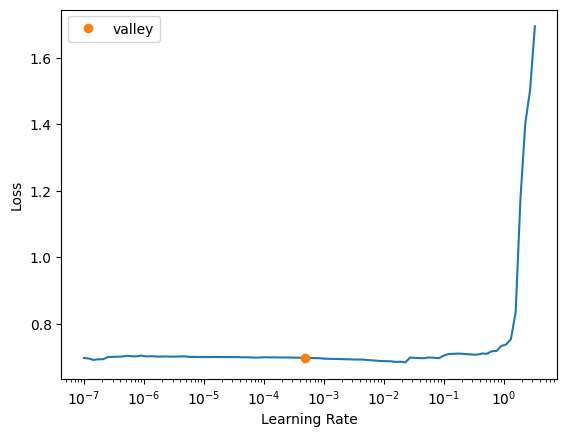

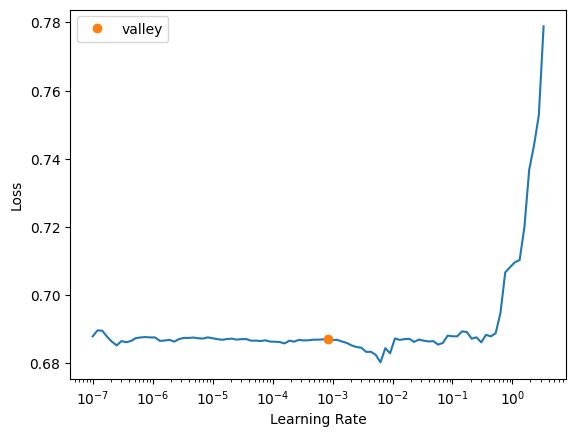

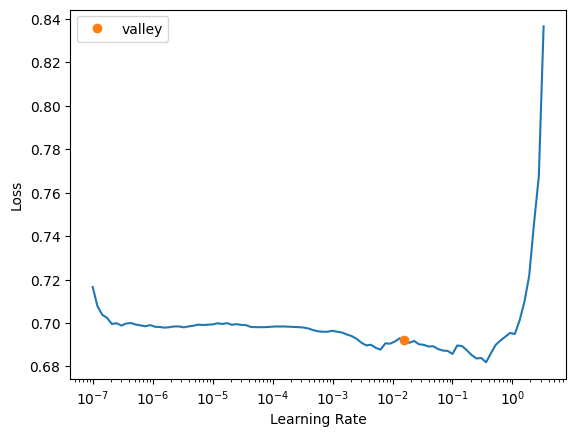

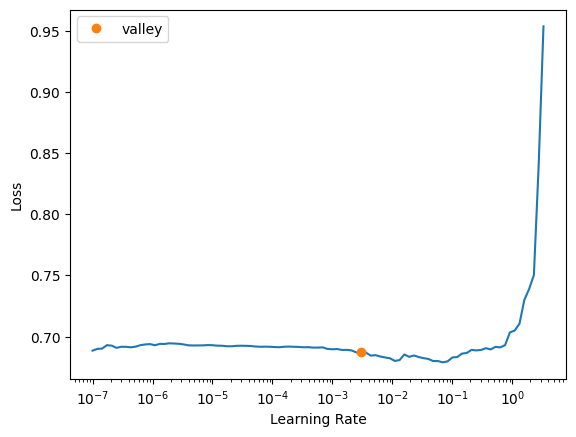

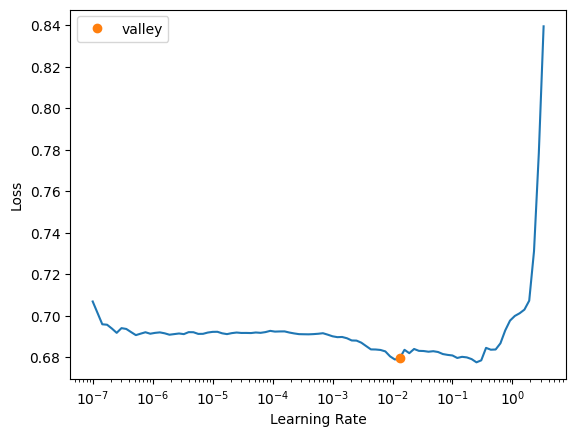

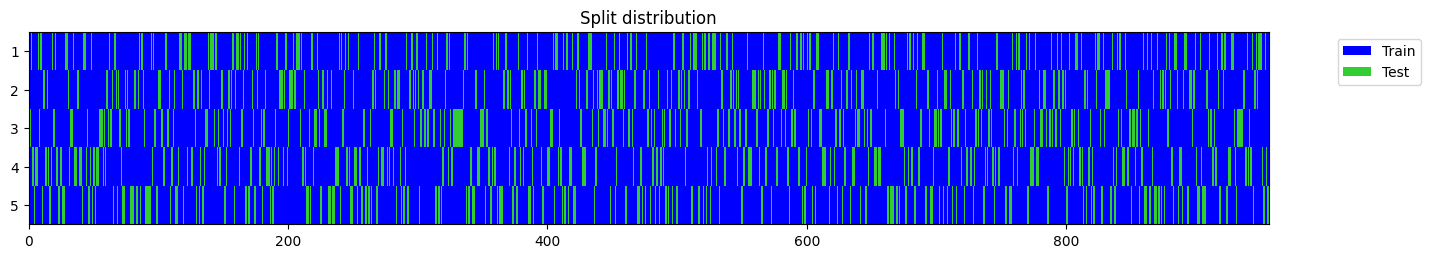

epoch,train_loss,valid_loss,accuracy,time
0,0.697623,0.695737,0.458333,00:02
1,0.695510,0.692186,0.510417,00:02
2,0.692586,0.688254,0.541667,00:02
3,0.688745,0.684475,0.557292,00:02
4,0.683409,0.675471,0.604167,00:03
5,0.674014,0.661689,0.588542,00:03
6,0.664265,0.703847,0.557292,00:03
7,0.655854,0.664522,0.604167,00:03
8,0.646043,0.663627,0.598958,00:02
9,0.634953,0.673123,0.572917,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.689846,0.689888,0.549738,00:02
1,0.688275,0.684011,0.581152,00:02
2,0.686098,0.674843,0.570681,00:02
3,0.683514,0.665973,0.612565,00:02
4,0.679544,0.654014,0.654450,00:02
5,0.672814,0.620317,0.659686,00:02
6,0.661658,0.593557,0.680628,00:02
7,0.649646,0.587448,0.675393,00:02
8,0.638258,0.587136,0.675393,00:03
9,0.629741,0.586501,0.680628,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.691518,0.690206,0.507853,00:03
1,0.688831,0.688757,0.513089,00:03
2,0.687727,0.686400,0.518325,00:02
3,0.684675,0.680927,0.534031,00:02
4,0.680277,0.667557,0.607330,00:02
5,0.670037,0.649697,0.638743,00:03
6,0.662510,0.643054,0.623037,00:03
7,0.656465,0.643006,0.612565,00:02
8,0.647660,0.643386,0.638743,00:03
9,0.639831,0.635591,0.623037,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.701025,0.700994,0.492147,00:03
1,0.699473,0.695746,0.492147,00:03
2,0.697624,0.688781,0.528796,00:03
3,0.693994,0.681194,0.544503,00:03
4,0.687826,0.668114,0.602094,00:03
5,0.678921,0.648983,0.586387,00:03
6,0.667772,0.605310,0.670157,00:03
7,0.654718,0.645202,0.654450,00:03
8,0.646852,0.612986,0.664921,00:03
9,0.638696,0.591843,0.691099,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.699537,0.703006,0.497382,00:03
1,0.695927,0.694034,0.513089,00:02
2,0.690371,0.685585,0.575916,00:03
3,0.684254,0.681676,0.560209,00:03
4,0.678199,0.670821,0.596859,00:03
5,0.669422,0.650955,0.633508,00:03
6,0.655508,0.656351,0.575916,00:03
7,0.649877,0.633984,0.633508,00:03
8,0.642304,0.642573,0.623037,00:03
9,0.634387,0.633007,0.633508,00:03


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [20:11<00:00, 605.84s/it]


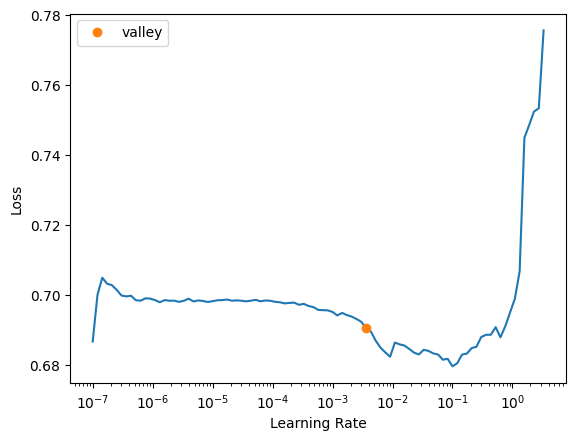

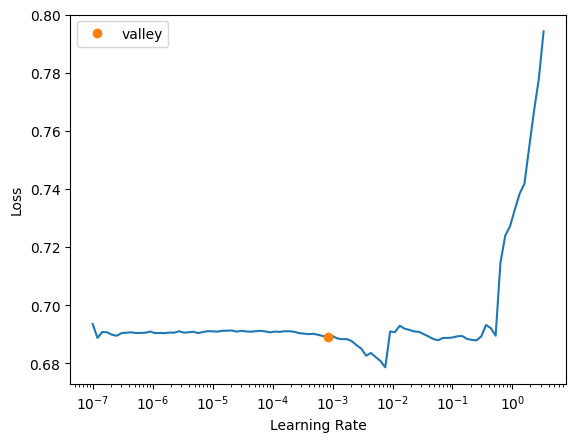

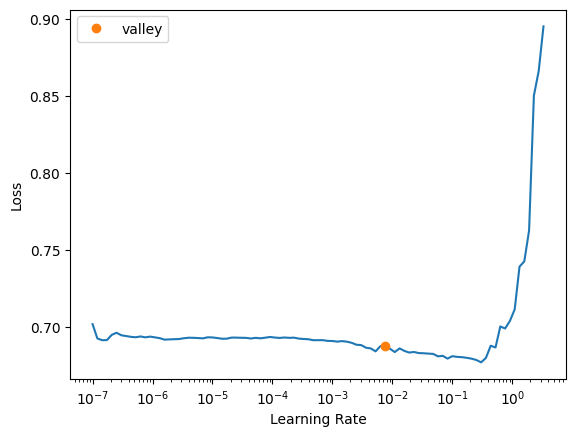

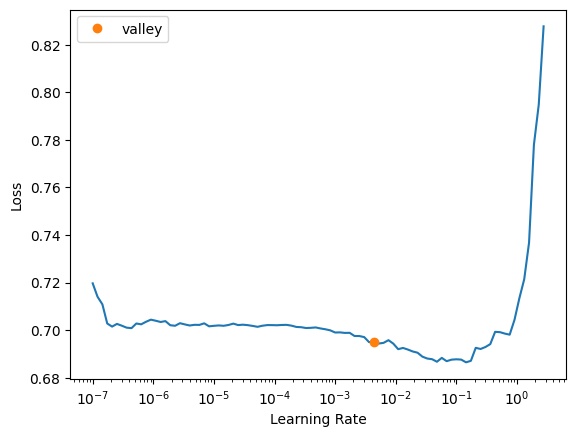

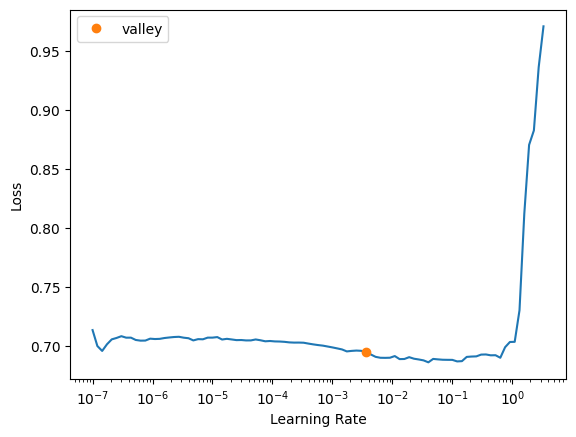

In [107]:
LSTM_acc_30_ep_table = model_score(T_bn, y, LSTM, n_repeats=2, epochs=30)
LSTM_acc_30_ep = f"{LSTM_acc_30_ep_table.mean():.5f} ± {LSTM_acc_30_ep_table.std():.5f}"

In [109]:
LSTM_acc_30_ep_table

array([[0.73958331, 0.7068063 , 0.7329843 , 0.75916231, 0.7068063 ],
       [0.66666669, 0.76963353, 0.69633508, 0.76963353, 0.67539269]])

In [108]:
LSTM_acc_30_ep

'0.72230 ± 0.03564'

{}


  0%|          | 0/1 [00:00<?, ?it/s]

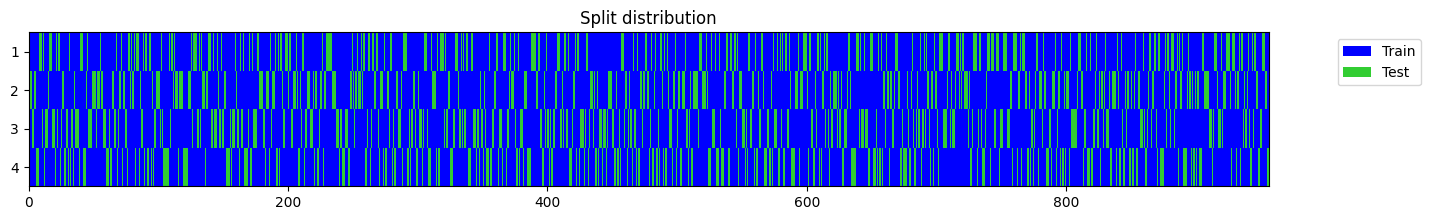

epoch,train_loss,valid_loss,accuracy,time
0,0.687161,0.683213,0.560669,00:05
1,0.685680,0.679869,0.564854,00:05
2,0.683867,0.675614,0.594142,00:04
3,0.681012,0.670540,0.602510,00:04
4,0.676214,0.660490,0.598326,00:04
5,0.669114,0.641409,0.627615,00:04
6,0.657888,0.627091,0.656904,00:03
7,0.646263,0.623029,0.648536,00:03
8,0.633701,0.647191,0.615063,00:03
9,0.621935,0.602128,0.669456,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.690368,0.689878,0.531381,00:04
1,0.689556,0.688035,0.531381,00:04
2,0.687574,0.684103,0.539749,00:03
3,0.685260,0.677770,0.564854,00:03
4,0.681194,0.665562,0.631799,00:03
5,0.673908,0.648064,0.635983,00:03
6,0.663822,0.622438,0.677824,00:03
7,0.648394,0.590646,0.694561,00:03
8,0.629061,0.604838,0.677824,00:03
9,0.618386,0.600363,0.694561,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.698797,0.700876,0.460251,00:04
1,0.696717,0.694181,0.552301,00:04
2,0.693484,0.687299,0.581590,00:05
3,0.690131,0.680685,0.577406,00:05
4,0.684864,0.669000,0.602510,00:04
5,0.676264,0.648481,0.602510,00:04
6,0.665887,0.630379,0.623431,00:04
7,0.651000,0.627266,0.619247,00:03
8,0.636846,0.621647,0.635983,00:03
9,0.622891,0.582264,0.698745,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.688366,0.690042,0.510460,00:04
1,0.687600,0.688385,0.518828,00:03
2,0.685986,0.685276,0.539749,00:03
3,0.683058,0.680674,0.577406,00:03
4,0.677802,0.669421,0.585774,00:03
5,0.667632,0.666497,0.585774,00:03
6,0.654154,0.691671,0.610879,00:03
7,0.637938,0.650722,0.623431,00:03
8,0.625725,0.658345,0.627615,00:03
9,0.616723,0.631616,0.656904,00:03


'0.73431 ± 0.01906'

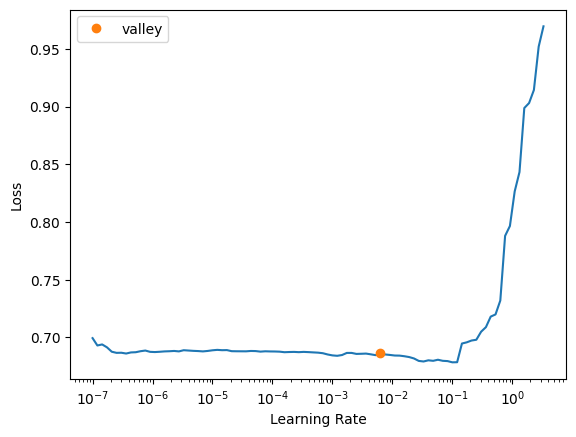

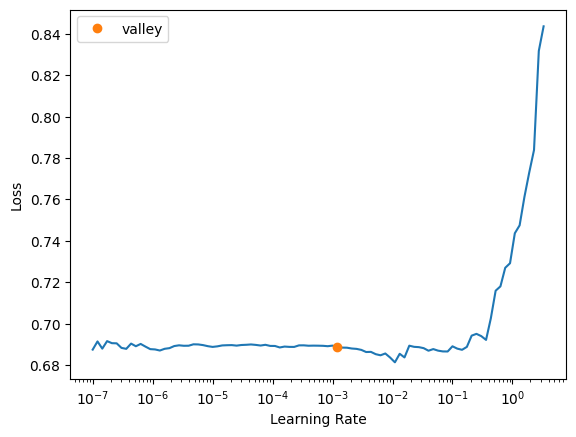

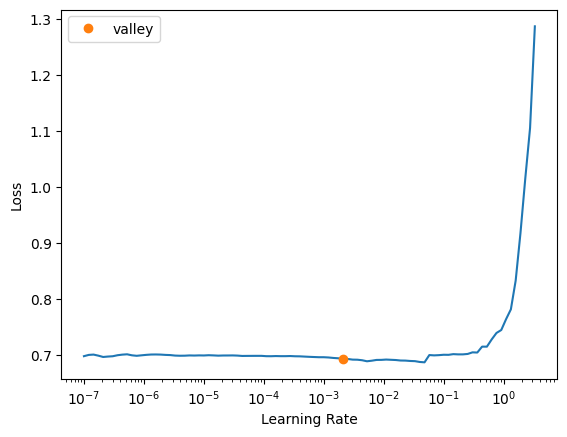

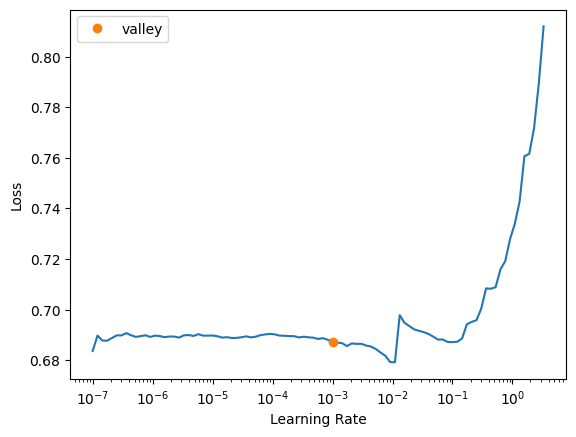

In [6]:
smn = [0, 1, 6, 7, 18, 19, 56, 57, 62, 63, 68, 69]
T_bn = np.transpose(T_raw, axes=(0, 2, 1))[:, smn]
T_bn.shape
LSTM_acc_30_ep_table = model_score(T_bn, y, LSTM, n_repeats=1, n_splits=4, epochs=30)
LSTM_acc_30_ep = f"{LSTM_acc_30_ep_table.mean():.5f} ± {LSTM_acc_30_ep_table.std():.5f}"
LSTM_acc_30_ep

In [ ]:
smn = [0, 1, 6, 7, 18, 19, 56, 57, 62, 63, 68, 69]
T_bn = np.transpose(T_raw, axes=(0, 2, 1))[:, smn]
T_bn.shape
LSTM_acc_30_ep_table = model_score(T_bn, y, LSTM, n_repeats=1, n_splits=3, epochs=10)
LSTM_acc_30_ep = f"{LSTM_acc_30_ep_table.mean():.5f} ± {LSTM_acc_30_ep_table.std():.5f}"
LSTM_acc_30_ep

In [7]:
LSTM_acc_30_ep

'0.73431 ± 0.01906'

**Conv model**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.optim.lr_scheduler import _LRScheduler
from torch.utils.data import TensorDataset, DataLoader

In [6]:
class _SepConv1d(nn.Module):
    """A simple separable convolution implementation.
    
    The separable convlution is a method to reduce number of the parameters 
    in the deep learning network for slight decrease in predictions quality.
    """
    def __init__(self, ni, no, kernel, stride, pad):
        super().__init__()
        self.depthwise = nn.Conv1d(ni, ni, kernel, stride, padding=pad, groups=ni)
        self.pointwise = nn.Conv1d(ni, no, kernel_size=1)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))
    
class SepConv1d(nn.Module):
    """Implementes a 1-d convolution with 'batteries included'.
    
    The module adds (optionally) activation function and dropout layers right after
    a separable convolution layer.
    """
    def __init__(self, ni, no, kernel, stride, pad, drop=None,
                 activ=lambda: nn.ReLU(inplace=True)):
    
        super().__init__()
        assert drop is None or (0.0 < drop < 1.0)
        layers = [_SepConv1d(ni, no, kernel, stride, pad)]
        if activ:
            layers.append(activ())
        if drop is not None:
            layers.append(nn.Dropout(drop))
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x): 
        return self.layers(x)

In [56]:
class TSConv_Net(nn.Module):
    def __init__(self, in_dim=12, out_dim=2, drop=0.2):
        super().__init__()

        self.raw = nn.Sequential(
            SepConv1d(in_dim,  32, 3, 2, 3, drop=drop),
            SepConv1d(    32,  64, 3, 4, 2, drop=drop),
            SepConv1d(    64, 128, 3, 4, 2, drop=drop),
            SepConv1d(   128, 256, 3, 4, 2),
            nn.Flatten(),
            nn.Dropout(drop), nn.Linear(768, 64), nn.ReLU(inplace=True),
            nn.Dropout(drop), nn.Linear( 64, 64), nn.ReLU(inplace=True))
        
        # raw -> transform (i.e. fft, persistent diagram) -> another pipeline
        
        self.out = nn.Sequential(
            nn.Linear(64, 64), nn.ReLU(inplace=True), nn.Linear(64, out_dim))
    
    def forward(self, x):
        raw_out = self.raw(x)
        # fft_out = self.fft(t_fft)
        # t_in = torch.cat([raw_out, fft_out], dim=1)
        out = self.out(raw_out)
        return out
     

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output


sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    # clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [58]:
def train_TSConv_Net(X_train, y_train, X_test, y_test):
    train_ds = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).long())
    test_ds = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).long())
    train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)
    
    NUM_EPOCHS = 50
    lr = 3e-4
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model = TSConv_Net().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS)
    criterion = nn.CrossEntropyLoss()
    
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    for epoch in tqdm(range(1, NUM_EPOCHS + 1)):
        train_loss, train_accuracy = 0.0, 0.0
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            # images: batch_size x num_channels x height x width
            logits = model(images)
            # logits: batch_size x num_classes
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.shape[0]
            train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        if scheduler is not None:
            scheduler.step()

        train_loss /= len(train_loader.dataset)
        train_accuracy /= len(train_loader.dataset)
        train_losses += [train_loss]
        train_accuracies += [train_accuracy]

        test_loss, test_accuracy = 0.0, 0.0
        model.eval()
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                logits = model(images)
                # logits: batch_size x num_classes
                loss = criterion(logits, labels)

            test_loss += loss.item() * images.shape[0]
            test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        test_loss /= len(test_loader.dataset)
        test_accuracy /= len(test_loader.dataset)
        test_losses += [test_loss]
        test_accuracies += [test_accuracy]
    plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)
    return model, max(test_accuracies)

In [59]:
def score(X, y, get_model, n_repeats=10, n_splits=5):
    accuracy_table = np.zeros((n_repeats, n_splits))
    for i in tqdm(range(n_repeats)):
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i)
        for j, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            seed = i * n_repeats + j
            torch.manual_seed(seed)
            random.seed(seed)
            np.random.seed(seed)

            model, accuracy_table[i, j] = get_model(X_train, y_train, X_test, y_test)
    return accuracy_table

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

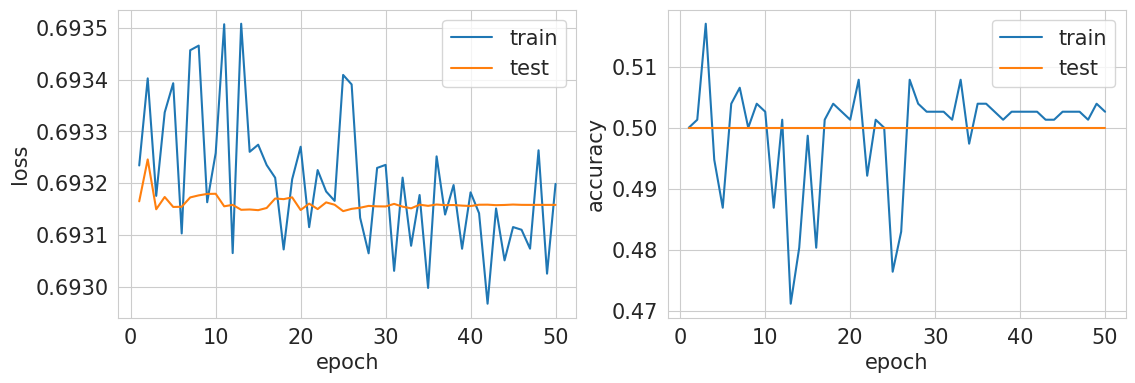

  0%|          | 0/50 [00:00<?, ?it/s]

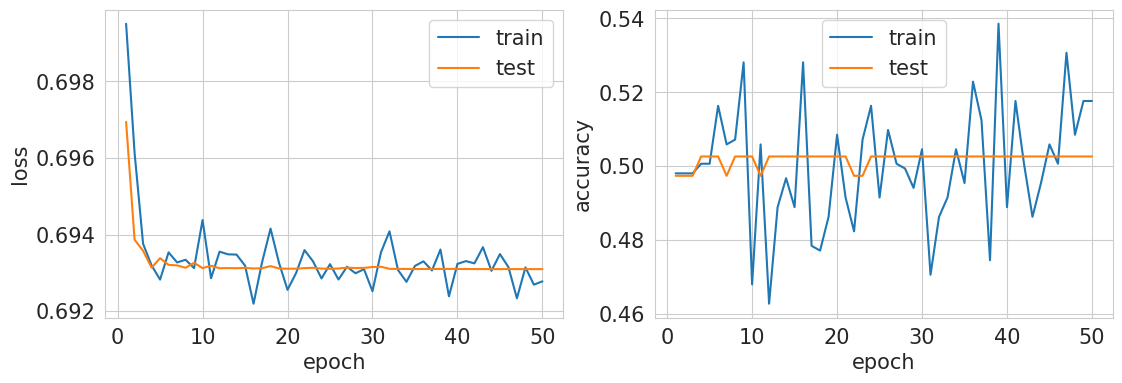

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [60]:
ret = score(T_bn, y, train_TSConv_Net, n_repeats=2)

In [49]:
print(f"{ret.mean():.5f} ± {ret.std():.5f}")

0.60772 ± 0.05419


**Misc**

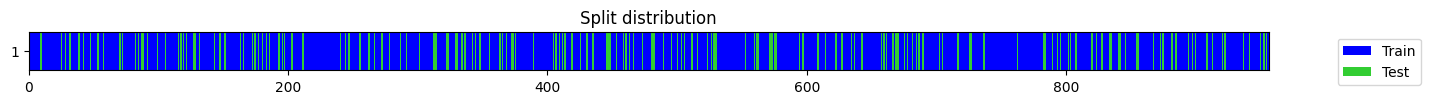

((#765) [637,394,207,917,651,779,346,887,750,432...],
 (#191) [115,266,458,503,192,840,185,419,84,314...])

In [4]:
splits = get_splits(y, valid_size=.2, stratify=True, random_state=0, shuffle=True)
splits

In [5]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(T_bn, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#956) [(TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:12, len:226, device=cpu, dtype=torch.float32), TensorCategory(0))] ...]

In [6]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

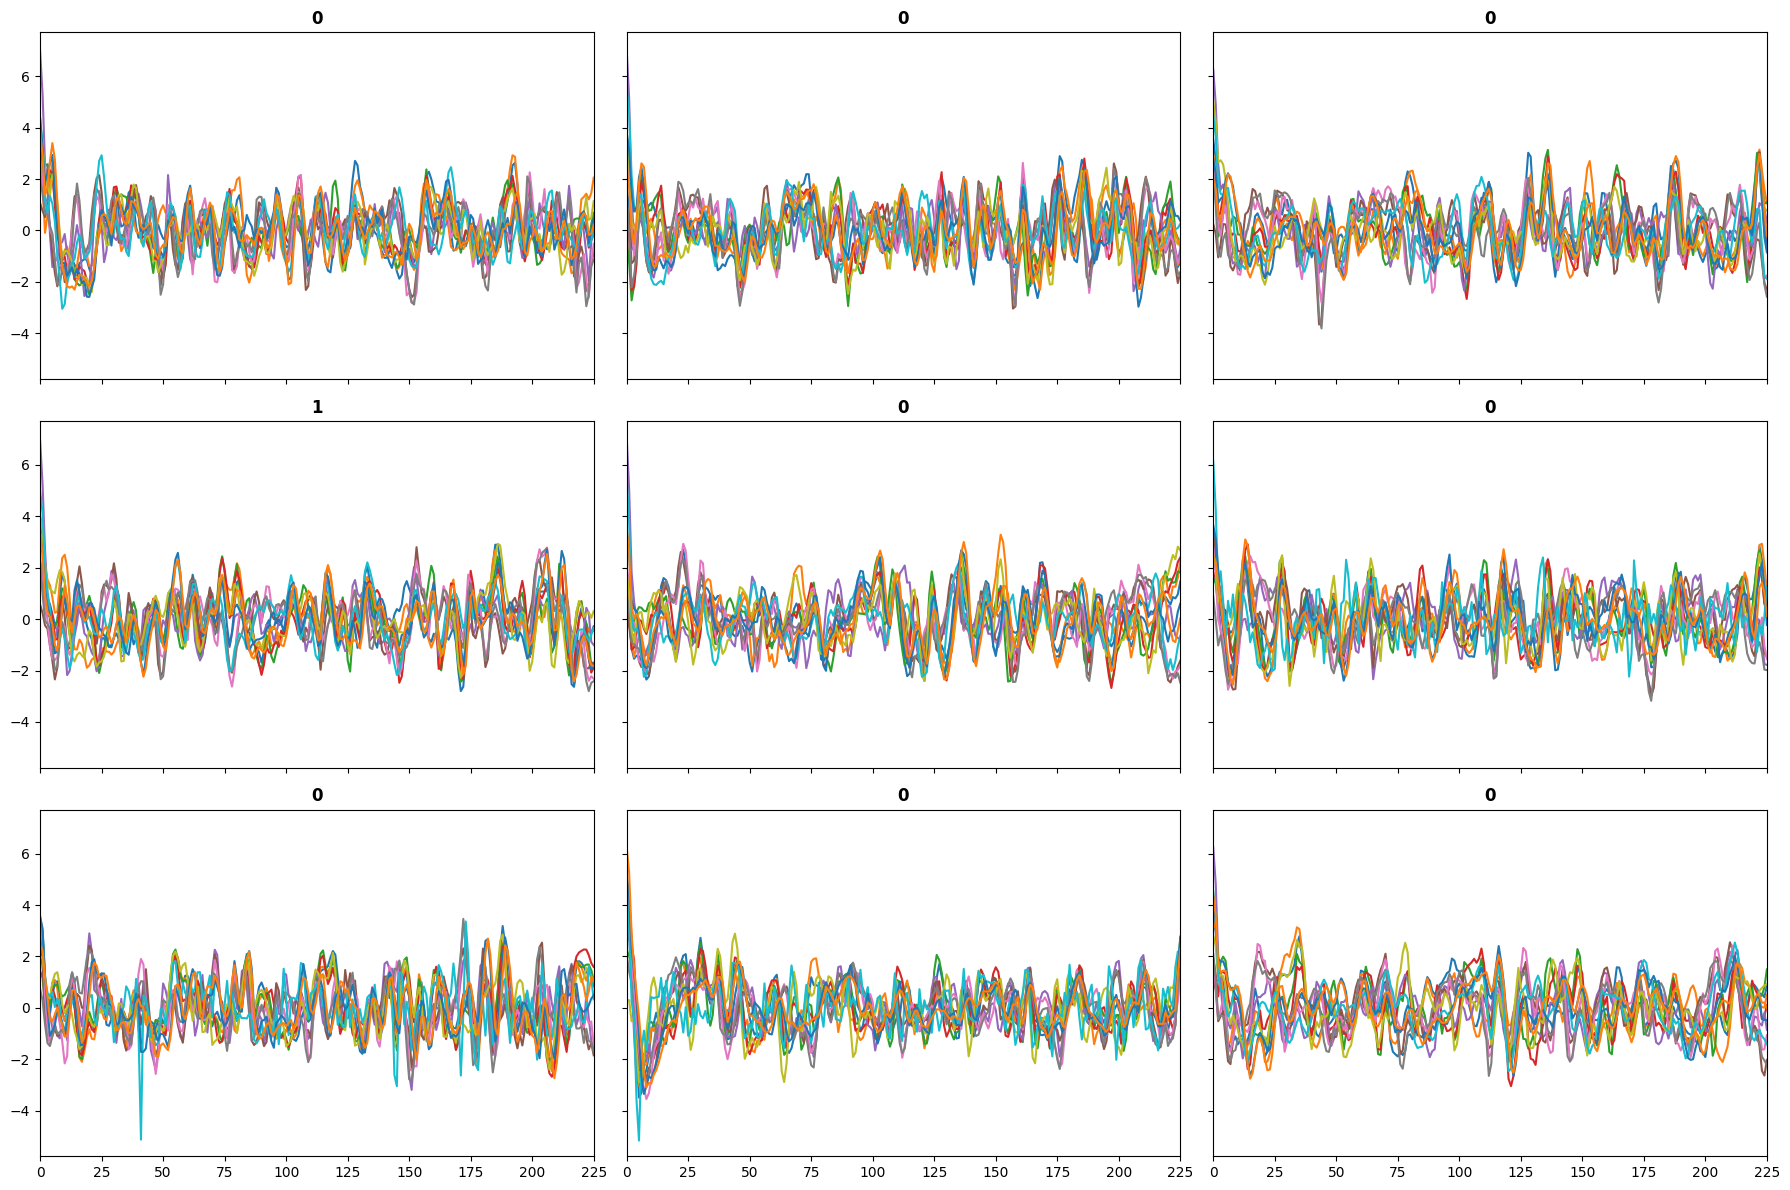

In [45]:
dls.show_batch(sharey=True)

In [7]:
model = MLSTM_FCN(dls.vars, dls.c, seq_len=226)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')

Path('models/stage0.pth')

SuggestedLRs(valley=0.0014454397605732083)

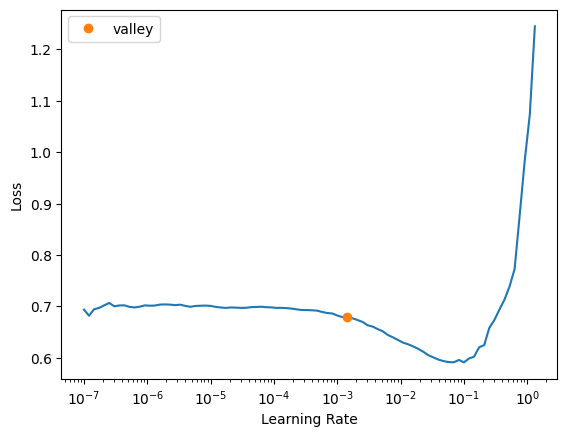

In [8]:
learn.load('stage0')
learn.lr_find()

In [42]:
df = learn.fit_one_cycle(5)#, lr_max=1e-3)
#learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,0.385880,0.490390,0.717277,00:04
1,0.360420,1.029403,0.554974,00:05
2,0.323916,0.354924,0.853403,00:05
3,0.288189,0.412863,0.827225,00:05
4,0.262143,0.337374,0.858639,00:05


In [14]:
res = learn.get_preds()

In [34]:
(res[0].numpy().argmax(axis=1) == y[splits[1]]).sum() / y[splits[1]].size

0.8167539267015707

In [44]:
learn.recorder.losses

[TensorBase(0.3920),
 TensorBase(0.3890),
 TensorBase(0.3884),
 TensorBase(0.3972),
 TensorBase(0.3896),
 TensorBase(0.4039),
 TensorBase(0.4011),
 TensorBase(0.3958),
 TensorBase(0.3926),
 TensorBase(0.3901),
 TensorBase(0.3859),
 TensorBase(0.3832),
 TensorBase(0.3754),
 TensorBase(0.3754),
 TensorBase(0.3787),
 TensorBase(0.3738),
 TensorBase(0.3677),
 TensorBase(0.3635),
 TensorBase(0.3666),
 TensorBase(0.3614),
 TensorBase(0.3634),
 TensorBase(0.3604),
 TensorBase(0.3588),
 TensorBase(0.3562),
 TensorBase(0.3516),
 TensorBase(0.3474),
 TensorBase(0.3432),
 TensorBase(0.3383),
 TensorBase(0.3337),
 TensorBase(0.3285),
 TensorBase(0.3301),
 TensorBase(0.3270),
 TensorBase(0.3239),
 TensorBase(0.3193),
 TensorBase(0.3146),
 TensorBase(0.3120),
 TensorBase(0.3098),
 TensorBase(0.3067),
 TensorBase(0.3030),
 TensorBase(0.3009),
 TensorBase(0.2982),
 TensorBase(0.2933),
 TensorBase(0.2902),
 TensorBase(0.2882),
 TensorBase(0.2838),
 TensorBase(0.2807),
 TensorBase(0.2796),
 TensorBase(0

In [76]:
np.array(learn.recorder.values)[:, 2]

array([0.71727747, 0.55497384, 0.85340315, 0.82722515, 0.85863876])

In [71]:
np.max(np.array(learn.recorder.values)[:, 2])

0.8586387634277344

In [52]:
learn.recorder.metric_names

(#5) ['epoch','train_loss','valid_loss','accuracy','time']

In [30]:
learn.fit_one_cycle(25, lr_max=1e-3)
learn.save('stage2')

epoch,train_loss,valid_loss,accuracy,time
0,0.009292,0.463863,0.806283,00:03
1,0.009015,0.597416,0.832461,00:03
2,0.009387,0.519967,0.806283,00:03
3,0.009719,0.689963,0.821990,00:03
4,0.008767,1.356770,0.727749,00:03
5,0.007563,0.823992,0.785340,00:03
6,0.006510,0.821333,0.811518,00:03
7,0.005453,0.596626,0.821990,00:03
8,0.004509,0.582643,0.801047,00:03
9,0.003826,0.573480,0.811518,00:03


Path('models/stage2.pth')

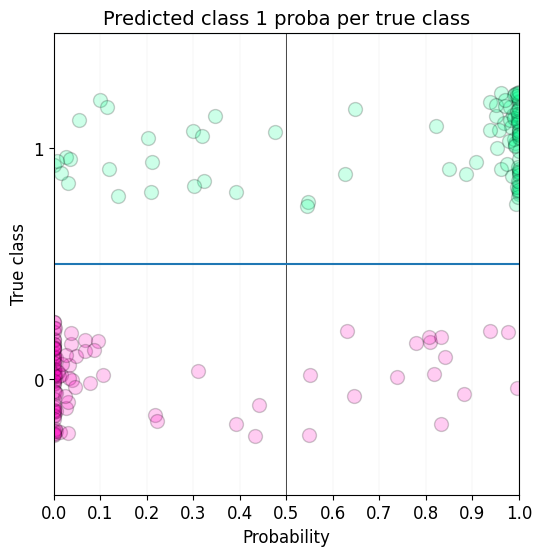

In [27]:
learn.show_probas()

[(1, 0, 21), (0, 1, 16)]

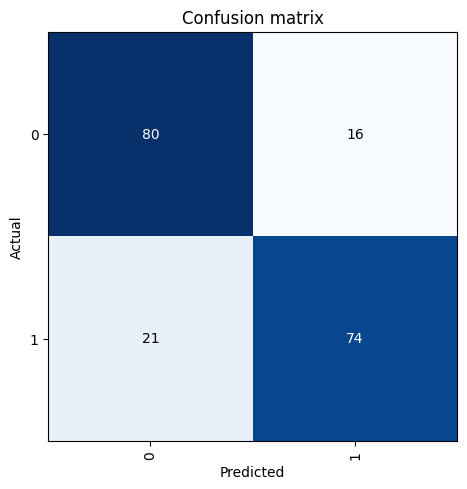

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)

In [34]:
model = LSTM(dls.vars, dls.c)
learn2 = Learner(dls, model, metrics=accuracy)
learn2.save('stage0_LSTM')

Path('models/stage0_LSTM.pth')

SuggestedLRs(valley=0.0030199517495930195)

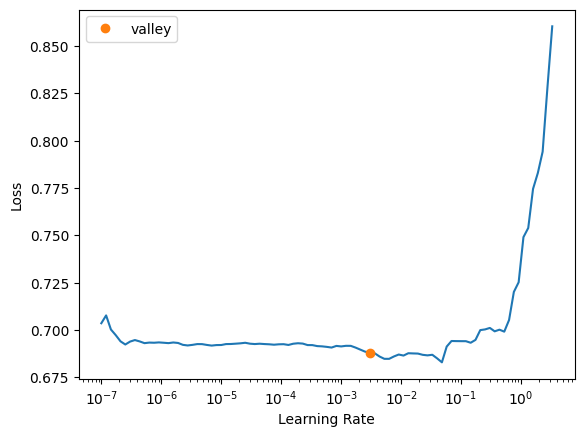

In [35]:
learn2.load('stage0_LSTM')
learn2.lr_find()

In [40]:
learn2.fit_one_cycle(25)#, lr_max=1e-3)
learn2.save('stage1_LSTM')

epoch,train_loss,valid_loss,accuracy,time
0,0.692950,0.693782,0.476440,00:03
1,0.692111,0.691199,0.497382,00:03
2,0.689042,0.689419,0.492147,00:02
3,0.685326,0.682771,0.539267,00:02
4,0.677564,0.665757,0.607330,00:02
5,0.665625,0.675595,0.596859,00:02
6,0.655896,0.635180,0.612565,00:02
7,0.647164,0.634011,0.633508,00:02
8,0.636591,0.622654,0.602094,00:02
9,0.628368,0.646173,0.643979,00:02


Path('models/stage1_LSTM.pth')

In [41]:
learn2.fit_one_cycle(25)#, lr_max=1e-3)
learn2.save('stage2_LSTM')

epoch,train_loss,valid_loss,accuracy,time
0,0.462694,0.551592,0.706806,00:03
1,0.465273,0.547768,0.712042,00:03
2,0.463568,0.551107,0.743455,00:03
3,0.462284,0.585035,0.659686,00:02
4,0.461810,0.579162,0.696335,00:02
5,0.477192,0.682294,0.628272,00:03
6,0.498650,0.634961,0.602094,00:02
7,0.503029,0.562715,0.701571,00:03
8,0.490186,0.571633,0.701571,00:02
9,0.486321,0.601728,0.659686,00:03


Path('models/stage2_LSTM.pth')